<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Quantum_Hawking_Radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer matplotlib pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0a844c33adaa931f93aeca6f552191fa03eb8486febcc08aacad7e4be0156e1d
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Hawking Radiation Results for theta = 0.79:
Counts: {'1': 1027, '0': 1021}
Probability of detecting Hawking Radiation: 50.15%


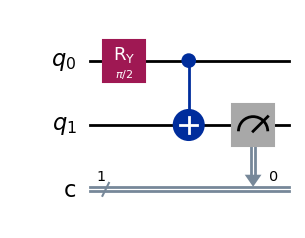

In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ----------------------------------------
# Parameters
# ----------------------------------------
# theta determines the "temperature"
# pi/4 = Maximally entangled (Highest entropy)
theta = np.pi / 4
shots = 2048

# ----------------------------------------
# Create Quantum Circuit
# ----------------------------------------
# q0 = Inside the Horizon
# q1 = Outside the Horizon (The Radiation)
qc = QuantumCircuit(2, 1)

# Step 1: Create the pair (Vacuum Fluctuation)
qc.ry(2 * theta, 0)

# Step 2: Entangle them (The Event Horizon split)
qc.cx(0, 1)

# Step 3: Measure ONLY the particle that escaped
qc.measure(1, 0)

# ----------------------------------------
# Execution
# ----------------------------------------
backend = AerSimulator()
# We don't need 'execute' anymore, we can just run the backend
job = backend.run(qc, shots=shots)
result = job.result()
counts = result.get_counts()

# ----------------------------------------
# Output & Visualization
# ----------------------------------------
print(f"Hawking Radiation Results for theta = {theta:.2f}:")
print(f"Counts: {counts}")

# Calculate the probability of detecting a particle (|1>)
prob_radiation = counts.get('1', 0) / shots
print(f"Probability of detecting Hawking Radiation: {prob_radiation * 100:.2f}%")

# Draw the circuit
display(qc.draw('mpl'))

# Plot the results
plot_histogram(counts)
plt.show()